In [1]:
import numpy.random as npr
import numpy as np
import pandas as pd
import numpy.random as npr
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
nusers = 100
treeatment = npr.choice([0,1], nusers)
group = npr.choice(np.arange(7),nusers)+1
covariate = npr.normal(0,1,nusers)
metric = 1 * covariate + npr.normal(0,0.1*group,nusers) +  0.1*treeatment                      

In [3]:
df = pd.DataFrame([treeatment, group, covariate, metric], index=['treeatment', 'group', 'covariate', 'metric']).T
df

,treeatment,group,covariate,metric
0,0.0,1.0,-1.003941,-0.992714
1,1.0,2.0,0.142334,0.053236
2,1.0,6.0,0.743312,0.843279
3,1.0,2.0,0.217737,0.264110
4,0.0,6.0,0.530125,-1.006680
...,...,...,...,...
95,1.0,6.0,1.311691,0.813114
96,1.0,7.0,-1.646425,-2.003313
97,0.0,6.0,-1.321366,-0.661876
98,0.0,5.0,-0.099288,-0.265809


In [4]:
df.groupby([df.treeatment, df.group]).mean()

covariate    metric
treeatment group                     
0.0        1.0    -0.139227 -0.139208
           3.0     0.697336  0.539387
           4.0    -0.783475 -0.894069
           5.0    -0.147853 -0.424298
           6.0    -0.046106 -0.226620
           7.0    -0.271369 -0.732498
1.0        1.0     0.534566  0.777544
           2.0     0.125774  0.192190
           3.0    -0.413563 -0.505190
           4.0    -0.475619 -0.422861
           5.0    -0.373410 -0.365910
           6.0     0.590873  0.705848
           7.0    -0.468262 -0.038923

In [5]:
df['cuped_metric'] = metric - (np.cov(covariate,metric)[0,1]/np.var(covariate)) * (covariate - np.mean(covariate))

In [6]:
np.var(df['metric']), np.var(df['cuped_metric'])

(1.0660194110413077, 0.22151680312150193)

In [7]:
# VAR_Y_HAT = 
np.var(metric) * (1 - np.corrcoef(covariate,metric)[0,1])

0.11715269985775771

In [8]:
import statsmodels.stats.weightstats as smw

In [9]:
x = df['metric'][df['treeatment']==0]
y = df['metric'][df['treeatment']!=0]

In [10]:
smw.ttest_ind(x,y,usevar='pooled')

(-2.129776676312806, 0.035694800375430824, 98.0)

In [11]:
smw.ttest_ind(x,y,usevar='unequal')

(-2.152288092173443, 0.03394121985533086, 93.80901316434075)

In [12]:
x = df['cuped_metric'][df['treeatment']==0]
y = df['cuped_metric'][df['treeatment']!=0]

In [13]:
smw.ttest_ind(x,y,usevar='pooled')

(-3.69924200456684, 0.0003569519048040324, 98.0)

In [14]:
smw.ttest_ind(x,y,usevar='unequal')

(-3.755525751328931, 0.00029816903431875106, 94.97677928056616)

### Linear Regression


In [15]:
x = df['covariate']
x = sm.add_constant(x)
model = sm.OLS(df['metric'], x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 metric   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     373.8
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           3.24e-35
Time:                        10:42:58   Log-Likelihood:                -66.512
No. Observations:                 100   AIC:                             137.0
Df Residuals:                      98   BIC:                             142.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0152      0.048     -0.316      0.7

In [16]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

Parameters:  const       -0.015210
covariate    0.945019
dtype: float64
R2:  0.7922827416719341


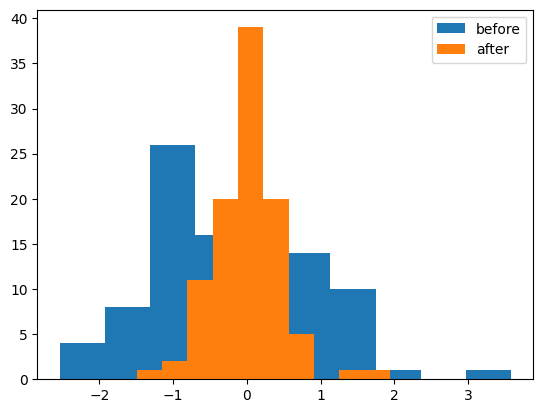

In [17]:
plt.hist(df['metric'])
plt.hist(results.resid)
plt.legend(['before','after'])

In [18]:
model = sm.OLS(results.resid, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                     0.000
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               1.00
Time:                        10:43:00   Log-Likelihood:                -66.512
No. Observations:                 100   AIC:                             137.0
Df Residuals:                      98   BIC:                             142.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.37e-16      0.048   2.85e-15      1.0

In [19]:
x = df['treeatment']
x = sm.add_constant(x)
model = sm.OLS(results.resid, x)
results_1 = model.fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     13.79
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           0.000340
Time:                        10:43:00   Log-Likelihood:                -59.929
No. Observations:                 100   AIC:                             123.9
Df Residuals:                      98   BIC:                             129.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1903      0.068     -2.804      0.0

In [20]:
print("Parameters: ", results_1.params)
print("R2: ", results_1.rsquared)


Parameters:  const        -0.190284
treeatment    0.333832
dtype: float64
R2:  0.12335616364718738


In [21]:
x = df.loc[:,['covariate', 'treeatment']]
x = sm.add_constant(x)
model = sm.OLS(df['metric'], x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 metric   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     218.0
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           1.30e-36
Time:                        10:43:01   Log-Likelihood:                -59.906
No. Observations:                 100   AIC:                             125.8
Df Residuals:                      97   BIC:                             133.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2075      0.069     -3.012      0.0

In [22]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)


Parameters:  const        -0.207535
covariate     0.935394
treeatment    0.334899
dtype: float64
R2:  0.8179878861455521


In [23]:
x = df.loc[:,['group', 'treeatment']]
x = sm.add_constant(x)
model = sm.OLS(df['metric'], x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 metric   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     2.489
Date:                Tue, 12 Dec 2023   Prob (F-statistic):             0.0883
Time:                        10:43:01   Log-Likelihood:                -142.59
No. Observations:                 100   AIC:                             291.2
Df Residuals:                      97   BIC:                             299.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2590      0.266     -0.975      0.3

In [24]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)


Parameters:  const        -0.259044
group        -0.033767
treeatment    0.440485
dtype: float64
R2:  0.04881011209664787


In [25]:
x = df.loc[:,['group', 'covariate', 'treeatment']]
x = sm.add_constant(x)
model = sm.OLS(df['metric'], x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 metric   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     143.9
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           2.11e-35
Time:                        10:43:02   Log-Likelihood:                -59.870
No. Observations:                 100   AIC:                             127.7
Df Residuals:                      96   BIC:                             138.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1826      0.117     -1.563      0.1

In [26]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)


Parameters:  const        -0.182571
group        -0.005779
covariate     0.934609
treeatment    0.335302
dtype: float64
R2:  0.818121250085852


### Clicks

Pageviews: Number of unique cookies to view the course overview page that day.

Clicks: Number of unique cookies to click the course overview page that day.

Enrollments: Number of user-ids to enroll in the free trial that day.

Payments: Number of user-ids who who enrolled on that day to remain enrolled for 14 days and thus make a payment. (Note that the date for this column is the start date, that is, the date
of enrollment, rather than the date of the payment. The payment happened 14 days later. Because of this, the enrollments and payments are tracked for 14 fewer days than the other columns.)

In [27]:
import math as mt
from scipy.stats import norm

In [28]:
control = pd.read_csv('control_data.csv')
treat = pd.read_csv('experiment_data.csv')

In [29]:
control['treatment'] = 0

In [32]:
treat['treatment'] = 1

In [36]:
df = pd.concat([control,treat], axis=0)

In [37]:
df

,Date,Pageviews,Clicks,Enrollments,Payments,treatment
0,"Sat, Oct 11",7723,687,134.0,70.0,0
1,"Sun, Oct 12",9102,779,147.0,70.0,0
2,"Mon, Oct 13",10511,909,167.0,95.0,0
3,"Tue, Oct 14",9871,836,156.0,105.0,0
4,"Wed, Oct 15",10014,837,163.0,64.0,0
...,...,...,...,...,...,...
32,"Wed, Nov 12",10042,802,NaN,NaN,1
33,"Thu, Nov 13",9721,829,NaN,NaN,1
34,"Fri, Nov 14",9304,770,NaN,NaN,1
35,"Sat, Nov 15",8668,724,NaN,NaN,1


In [38]:
Y = df['Clicks']
X = df['Pageviews']
Y_HAT = Y - (np.cov(X,Y)[0,1]/np.var(X)) * (X - np.mean(X))

In [39]:
VAR_Y_HAT = np.var(Y) * (1 - np.corrcoef(X,Y)[0,1])

In [40]:
# np.corrcoef(X,Y)
np.cov(X,Y)

array([[517616.6392077 ,  42725.43446872],
       [ 42725.43446872,   4356.74139208]])

In [41]:
np.var(Y_HAT), VAR_Y_HAT

(819.5076707711819, 431.0425152954054)